Zadanie 1:

In [8]:
import numpy as np

def DFT(x):
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n/N)   
    return  np.dot(M, x)

x = np.random.random(2048)
np.allclose(DFT(x), np.fft.fft(x))

True

Powyżej funkcja została porównana z transformatą obliczoną przez numpy i jak widać, funkcja daje taki sam wynik

Zadanie 2:

In [19]:
import numpy as np

def FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if N % 2 > 0:
        raise ValueError("x must be a power of 2")
    if N <= 32:
        return DFT(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:int(N / 2)] * X_odd,
                               X_even + factor[int(N / 2):] * X_odd])
    

np.allclose(FFT(x), np.fft.fft(x))

True

Zadanie 3:

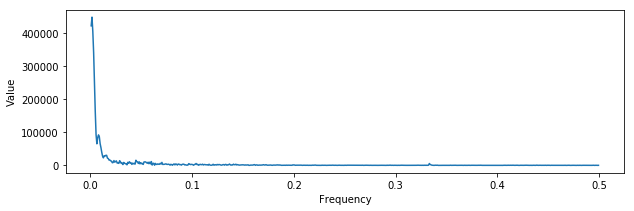

In [20]:
import pandas as pd
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

file = pd.read_csv('lab2_zad3_1.csv')
file.dtypes
n = len(file)
X = fftpack.fft(file['Thrust_Value'])
freq = fftpack.fftfreq(n)

f, ax = plt.subplots()
f.set_size_inches(10, 3)
ax.plot(freq[1:n//2], np.abs(X)[1:n//2])
ax.set_xlabel('Frequency')
ax.set_ylabel('Value')
plt.show()

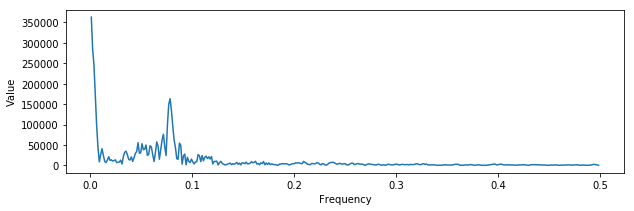

In [21]:
file = pd.read_csv('lab2_zad3_2.csv')
file.dtypes
n = len(file)
X = fftpack.fft(file['Thrust_Value'])
freq = fftpack.fftfreq(n)

f, ax = plt.subplots()
f.set_size_inches(10, 3)
ax.plot(freq[1:n//2], np.abs(X)[1:n//2])
ax.set_xlabel('Frequency')
ax.set_ylabel('Value')
plt.show()

Do przeprowadzenia FFT zostały użyte dane z testów hybrydowego silnika rakietowego (pomiar ciągu w czasie) i na powyższych wykresach widać, że w teście nr 1 silnik pracował stabilnie, natomiast w teście nr 2 widoczne są niestabilności o danych częstotliwościach.